### Packages Required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils import to_categorical
from keras import backend as K
from keras.datasets import mnist

### Datasets

In [55]:
# input image dimensions
img_rows, img_cols = 28, 28

In [56]:
(train_x,train_y),(test_x,test_y) = mnist.load_data()

In [57]:
classes = np.unique(train_y)
classes_num = len(classes)

Text(0.5, 1.0, 'Truth : 5')

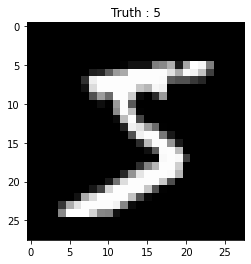

In [58]:
plt.imshow(train_x[0,:,:],cmap='gray')
plt.title('Truth : {}'.format(train_y[0]))

Text(0.5, 1.0, 'Truth : 7')

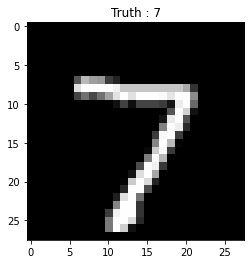

In [59]:
plt.imshow(test_x[0,:,:],cmap='gray')
plt.title('Truth : {}'.format(test_y[0]))

In [60]:
if K.image_data_format() == 'channels_first':
    train_x = train_x.reshape(train_x.shape[0], 1, img_rows, img_cols)
    test_x = test_x.reshape(test_x.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    train_x = train_x.reshape(train_x.shape[0], img_rows, img_cols, 1)
    test_x = test_x.reshape(test_x.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [61]:
#Convert the data to float and scale the values between 0 to 1.
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [18]:
train_x /= 255
test_x /= 255

In [62]:
# convert class vectors to binary class matrices For target variables since it is multinomial classification
train_y = keras.utils.to_categorical(train_y, classes_num)
test_y = keras.utils.to_categorical(test_y, classes_num)

### Model Building

In [63]:
#Input Parameters
batch_size = 128
num_classes = classes_num
epochs = 3

In [64]:
model = Sequential()  # Initialization of network -Inputlayer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) # Convolution layer 1
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))                          #Convolution Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))                                             #Pooling layer
#model.add(Dropout(0.25))                                                              #Dropout layer
model.add(Flatten())                                                                  #Flatten Layer
model.add(Dense(128, activation='relu'))                                              #Fully connected layer
#model.add(Dropout(0.5))                                                               #Dropout layer
model.add(Dense(num_classes, activation='softmax'))  

In [65]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [66]:
#Model compilation
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [67]:
model.fit(train_x, train_y,
          batch_size=600,
          epochs=3,
          verbose=1,
          validation_data=(test_x, test_y))

Epoch 1/3
100/100 [==============================] - 34s 338ms/step - loss: 13.6508 - accuracy: 0.1792 - val_loss: 8.8062 - val_accuracy: 0.2418
Epoch 2/3
100/100 [==============================] - 37s 370ms/step - loss: 6.6328 - accuracy: 0.3250 - val_loss: 4.7201 - val_accuracy: 0.4200
Epoch 3/3
100/100 [==============================] - 37s 371ms/step - loss: 3.8685 - accuracy: 0.4897 - val_loss: 2.9304 - val_accuracy: 0.5666


In [68]:
model.get_weights()

[array([[[[-0.11911906, -0.0154975 ,  0.06165205,  0.0497004 ,
           -0.1249995 , -0.03150998,  0.1003745 , -0.0980298 ,
            0.13257356,  0.04888259, -0.04543788, -0.01123797,
           -0.0306556 , -0.0642008 ,  0.13266037, -0.0640946 ,
           -0.1258287 ,  0.02929354, -0.11148174, -0.11878909,
            0.10456083,  0.06910788, -0.08198199, -0.13335678,
           -0.05680349, -0.0265431 , -0.107978  ,  0.09682666,
            0.05765012, -0.03626822, -0.1256449 , -0.09354425]],
 
         [[ 0.09918682,  0.11460163,  0.01570114,  0.06659481,
            0.07859343, -0.10770404, -0.04663756,  0.12885435,
           -0.122982  ,  0.01167516, -0.03896963,  0.00145837,
            0.07343113,  0.05127172,  0.03113477, -0.12783495,
            0.11606517,  0.04447745, -0.08457492, -0.01360324,
           -0.01698028, -0.05771761,  0.04151914,  0.07729232,
            0.09686177,  0.09862801, -0.12632309, -0.02048457,
            0.05083283,  0.09622177,  0.11782444, -

In [40]:
#[test_loss, test_acc] = model.evaluate(test_x, test_y)
#print("Evaluation result on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 2.2990 - accuracy: 0.1436
Evaluation result on Test Data : Loss = 2.299020767211914, accuracy = 0.1436000019311905


In [69]:
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Loss Curves')

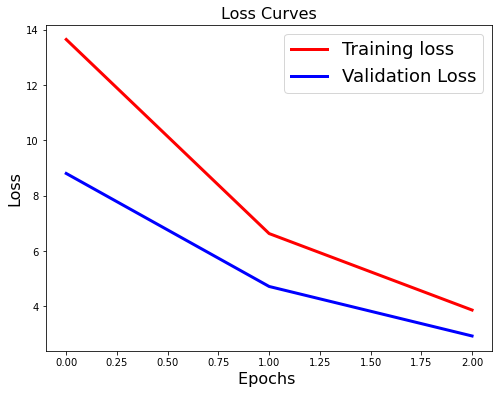

In [70]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(model.history.history['loss'],'r',linewidth=3.0)
plt.plot(model.history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

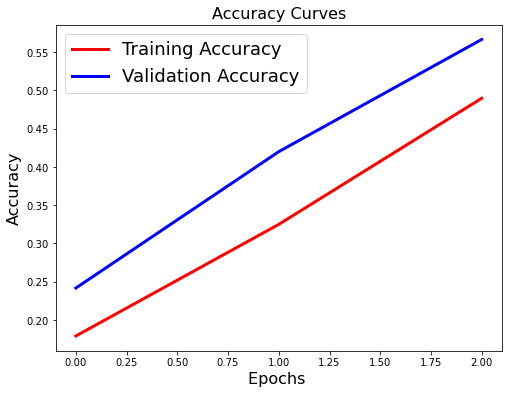

In [71]:
#Plot the Accuracy Curves
plt.figure(figsize=[8,6]) 
plt.plot(model.history.history['accuracy'],'r',linewidth=3.0) 
plt.plot(model.history.history['val_accuracy'],'b',linewidth=3.0) 
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18) 
plt.xlabel('Epochs ',fontsize=16) 
plt.ylabel('Accuracy',fontsize=16) 
plt.title('Accuracy Curves',fontsize=16)

In [72]:
model.predict(test_x)

313/313 [==============================] - 2s 6ms/step


array([[2.5044643e-05, 5.6274502e-07, 1.4618915e-13, ..., 9.9992359e-01,
        3.2719337e-05, 1.7909937e-05],
       [3.4338512e-14, 5.9991689e-05, 2.7457401e-01, ..., 1.0048988e-04,
        4.6859361e-09, 4.1204589e-13],
       [1.2256487e-06, 7.1054959e-01, 8.1623904e-04, ..., 4.8150778e-05,
        2.8845167e-01, 7.8390922e-10],
       ...,
       [2.7749829e-06, 8.2836429e-12, 6.8160424e-09, ..., 2.1836011e-01,
        9.9500758e-06, 1.2794471e-02],
       [7.4435853e-08, 3.1477848e-13, 1.2815282e-10, ..., 8.9120731e-05,
        1.2588905e-03, 2.0767717e-10],
       [1.4602809e-09, 9.8577062e-23, 8.5824108e-01, ..., 2.5594608e-07,
        1.3487872e-11, 4.0647667e-09]], dtype=float32)

In [73]:
np.argmax(test_y, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [51]:
from sklearn.metrics import classification_report

In [76]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
# Initialize the model
# Model initialization - Network structure
model2 = Sequential()  # Initialization of network -Inputlayer
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)) # Convolution layer 1
model2.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))                          #Convolution Layer 2
model2.add(MaxPooling2D(pool_size=(2, 2)))                                             #Pooling layer
#model.add(Dropout(0.25))                                                              #Dropout layer
model2.add(Flatten())                                                                  #Flatten Layer
model2.add(Dense(128, activation='relu'))                                              #Fully connected layer
#model.add(Dropout(0.5))                                                               #Dropout layer
model2.add(Dense(num_classes, activation='softmax'))                                   #Output Layer

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Set training process params
batch_size = 256
epochs = 5

# Define transformations for train data
datagen = ImageDataGenerator(
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

# Fit the model on the batches generated by datagen.flow().
history2 = model2.fit(datagen.flow(train_x, train_y, batch_size=batch_size),
                      steps_per_epoch=int(np.ceil(train_x.shape[0] / float(batch_size))),
                      epochs=epochs,
                      validation_data=(test_x, test_y),
                      workers=4
           )

model2.evaluate(test_x, test_y)

Epoch 1/5
235/235 [==============================] - 41s 172ms/step - loss: 1.9644 - accuracy: 0.8146 - val_loss: 0.1337 - val_accuracy: 0.9589
Epoch 2/5
235/235 [==============================] - 48s 204ms/step - loss: 0.1664 - accuracy: 0.9487 - val_loss: 0.1122 - val_accuracy: 0.9643
Epoch 3/5
235/235 [==============================] - 46s 197ms/step - loss: 0.1231 - accuracy: 0.9617 - val_loss: 0.0759 - val_accuracy: 0.9758
Epoch 4/5
235/235 [==============================] - 46s 196ms/step - loss: 0.1010 - accuracy: 0.9691 - val_loss: 0.0878 - val_accuracy: 0.9733
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0658 - accuracy: 0.9787


[0.06583103537559509, 0.9786999821662903]

Text(0.5, 1.0, 'Accuracy Curves')

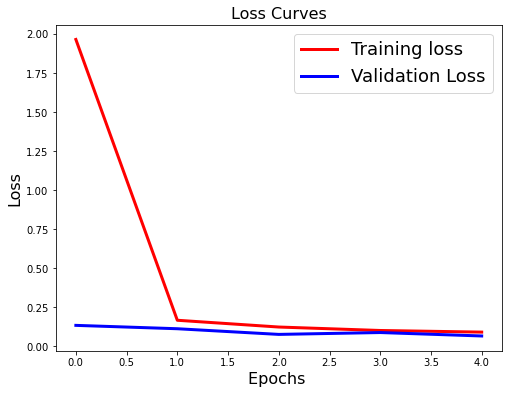

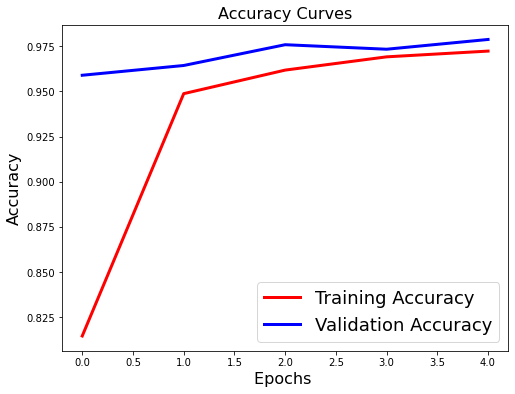

In [77]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.plot(history2.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)